## Abstract :
We know that the K nearest neighbor algorithm has hyper-parameter in addition to k. We are using the iris dataset over here and are implementing the KNN (k nearest neighbors) algorithm and are simultaneously tuning hyper-parameters by using the for function.

## About the dataset "Iris Dataset"
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.
The columns in this dataset are:
Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [21]:
#importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Since the joblib library is not present for this version of python as well for mac,hence installing the joblib library.

In [22]:
!pip install joblib

In [49]:
#importing the IRIS dataset and checking the shape and header of the data

my_df = pd.read_csv("IRIS.csv")
print(my_df.shape)
my_df.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [50]:
my_df.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [51]:
# Check if this data contains missing values
my_df.isnull().sum().max()

0

In [53]:
my_df['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

## Exploring Data

In [54]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


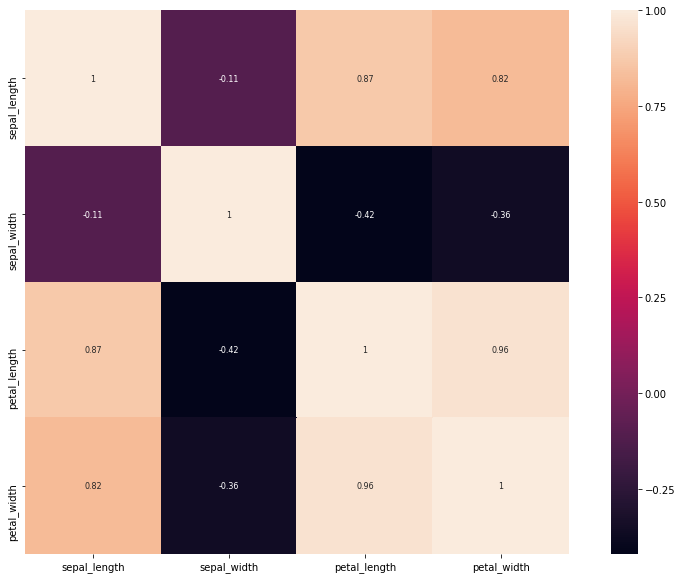

In [55]:
corr = my_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, square=True, annot=True, annot_kws={'size':8})

Petal Width and Petal Length are highly positively correlated. Similarly Sepal length and Petal Length are also highly positively correlated. Rest correlations are insignficant

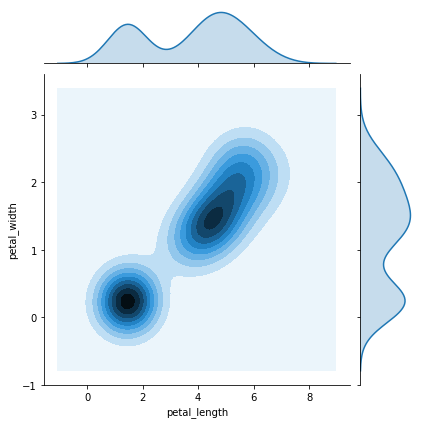

In [56]:
sns.jointplot(my_df['petal_length'], my_df['petal_width'],kind='kde')

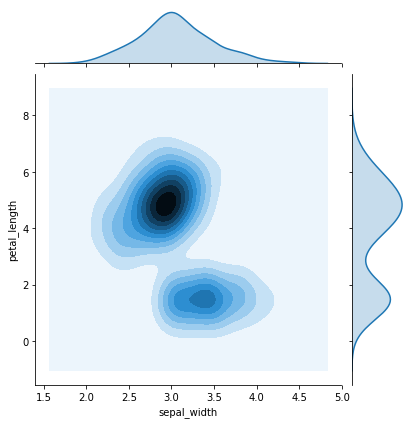

In [57]:
sns.jointplot(my_df['sepal_width'], my_df['petal_length'],kind='kde')

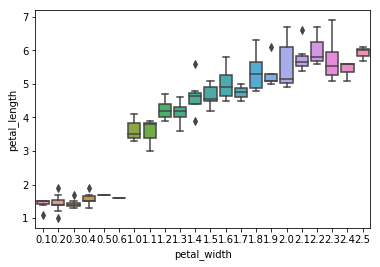

In [58]:
sns.boxplot(my_df['petal_width'], my_df['petal_length'])

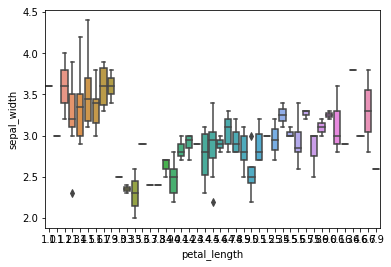

In [59]:
sns.boxplot(my_df['petal_length'], my_df['sepal_width'])

In [60]:
X = my_df.drop(columns='species')
y = my_df['species']

In [61]:
X.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

## To split the data into train and test


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



In [63]:
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [64]:
from sklearn.preprocessing import StandardScaler

# Normalize Training Data 
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Converting numpy array to dataframe
X_train_std_df = pd.DataFrame(X_train_std, index=X_train.index, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, index=X_test.index, columns=X_test.columns) 

In [65]:
X_train_std_df.head()

,sepal_length,sepal_width,petal_length,petal_width
104,0.764161,-0.177061,1.118100,1.247737
89,-0.426739,-1.398171,0.109288,0.098925
116,0.764161,-0.177061,0.949965,0.737154
82,-0.069469,-0.909727,0.053243,-0.028720
112,1.121431,-0.177061,0.949965,1.120092


In [66]:
train_std_data = pd.concat([X_train_std_df, y_train], axis=1)
train_std_data.var().sort_values()

petal_length    1.008403
petal_width     1.008403
sepal_length    1.008403
sepal_width     1.008403
dtype: float64

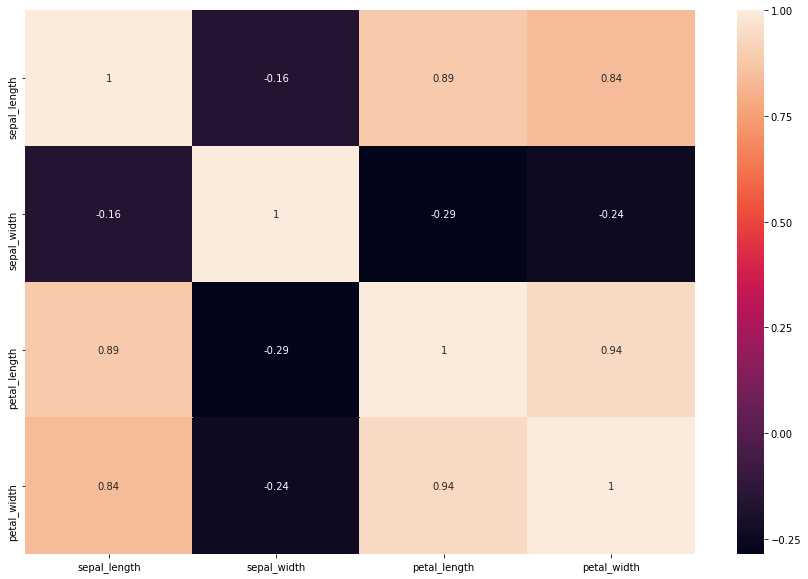

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(train_std_data.corr(method='spearman'), annot=True)

## K-Nearest Neighbour

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Tuning using K-fold Cross Validation We can tune using only Train/Validation set, but there are still problems:
We use less training data The model can potentially overfit to validation data, because: It is optimized based on validation data. Validation data can be only a small subset -> Cannot represent the population distribution. Solution: A smart way is using K-Fold CV

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
def plot_validation(param_grid, clf, X_train, y_train):
    val_error_rate = []

    for key in param_grid.keys():
        param_range = param_grid[key]
        for param in param_range:
            # https://stackoverflow.com/questions/337688/dynamic-keyword-arguments-in-python
            val_error = 1 - cross_val_score(clf.set_params(**{key: param}), X_train, y_train, cv=5).mean()
            val_error_rate.append(val_error)

        plt.figure(figsize=(15,7))
        plt.plot(param_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
                 markerfacecolor='black', markersize=5, label='Validation Error')

        plt.xticks(np.arange(param_range.start, param_range.stop, param_range.step), rotation=60)
        plt.grid()
        plt.legend()
        plt.title('Validation Error vs. {}'.format(key))
        plt.xlabel(key)
        plt.ylabel('Validation Error')
        plt.show()
    




## Hyperparameter Tuning

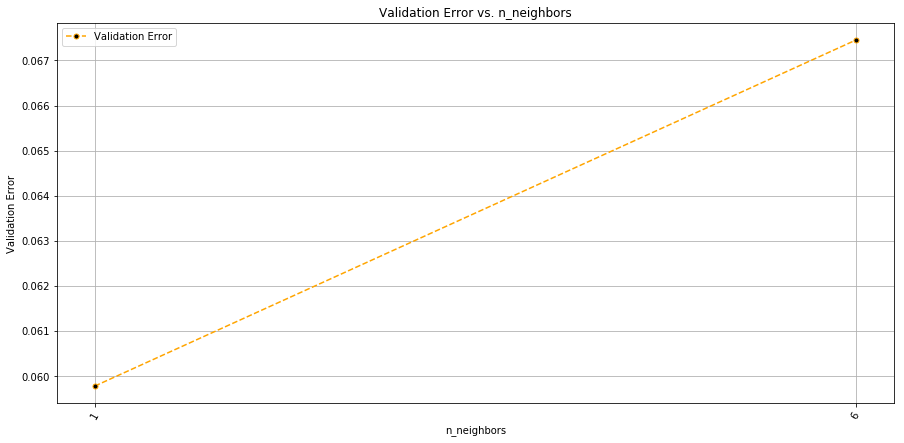

0.033333333333333326

In [77]:
neighbors_range = range(1,10,5)
param_grid = {'n_neighbors': neighbors_range}
plot_validation(param_grid, knn, X_train_std_df, y_train)
best_k = 5

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_std_df, y_train)
1-knn.score(X_test_std_df, y_test)

It seems like the curve neither overfits or underfits. But we can still say that it is slightly overfitting.

## SVM

In [78]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

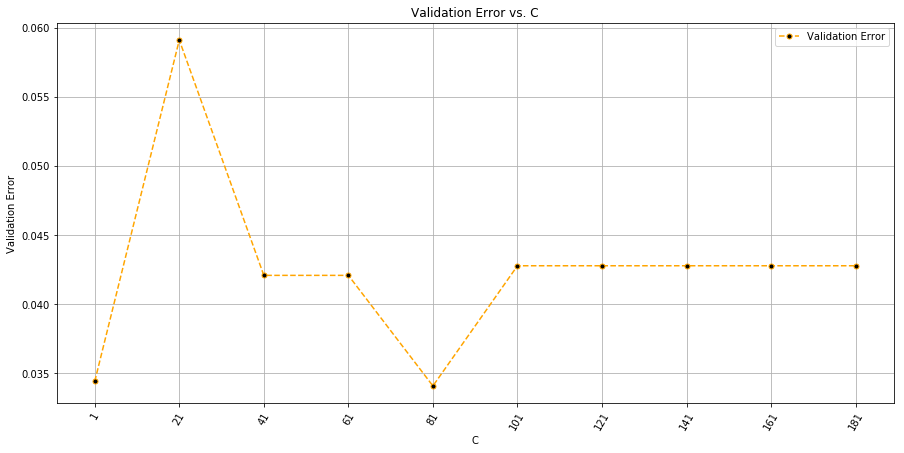

In [79]:
c_range =  range(1,200,20)
param_grid = {'C': c_range}
plot_validation(param_grid, svm, X_train_std_df, y_train)

In [80]:
best_c = 21
svm = SVC(kernel='linear',C=best_c)
svm.fit(X_train_std_df, y_train)
svm.score(X_test_std_df, y_test)

0.9666666666666667

## Non-linear SVM

Non-linear SVM Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points.

With one hyperparameter, we can plot validation curve as above, but with more than one hyperparameter, we cannot. Therefore, we use GridSearchCV as a more proper and convinient way.

## GridSearchCV

In [81]:
# Using GridSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C': c_range,
              'gamma': [.1, .5, .10, .25, .50, 1]}
gs = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
gs.fit(X_train_std_df,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': range(1, 200, 20), 'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
print("The best hyperparameters {}.".format(gs.best_params_))
print("The Mean CV score of the best_estimator is {:.2f}.".format(gs.best_score_))

The best hyperparameters {'C': 1, 'gamma': 0.1}.
The Mean CV score of the best_estimator is 0.97.


In [83]:
svm = SVC(kernel='rbf',C=1, gamma=0.1)
svm.fit(X_train_std_df, y_train)
svm.score(X_test_std_df, y_test)

1.0

## To inspect results

## KNN

0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



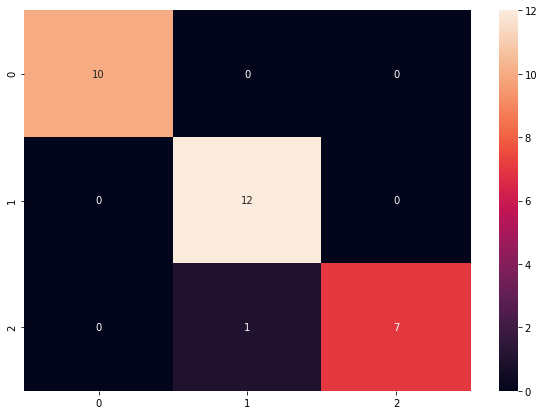

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_std_df, y_train)
pred = knn.predict(X_test_std_df)

print(knn.score(X_test_std_df,y_test))
print(classification_report(y_test,pred))

matrix=confusion_matrix(y_test,pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

## Contribution:

Finding missing values from the dataset

Hyperparameter Tuning

Prediction using the sklearn model

## Summary:

Following steps have been performed to complete this competition:
1) Introduction

2) Visualizations

3) Feature Engineering

4) Prediction

## Conclusion:

The best hyperparameters {'C': 1, 'gamma': 0.1}. Accuracy achieved:0.966

## Citations:

Dataset & Kernels:https://www.kaggle.com/iabhishekofficial/mobile-price-classification

KNN algorithm reference : https://scikit-learn.org/stable/modules/neighbors.html

KNN classifier information: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Video Reference: https://www.youtube.com/watch?v=85dtiMz9tSo


## Contribution:

By own: 50%

By external source:50%

# License:

Copyright 2019 Ria Rajput

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.